In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np 


In [ ]:
data = pd.read_csv("Cleaned_ecommerce.csv")
print(data)

In [9]:
data.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Year,Month (in date),Month (in text),Age_group
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14,2023,4,April,Senior
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30,2023,7,July,Senior
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17,2023,9,September,Adult
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21,2023,6,June,Adult
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29,2024,10,October,Senior


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
 8   Year              50000 non-null  int64  
 9   Month (in date)   50000 non-null  int64  
 10  Month (in text)   50000 non-null  object 
 11  Age_group         50000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 4.6+ MB


In [11]:
data.describe()

,Transaction_ID,Age,Purchase_Amount,Year,Month (in date)
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,25000.500000,43.968680,503.159793,2023.682580,6.52956
std,14433.901067,15.260578,286.563558,0.631247,3.45414
min,1.000000,18.000000,5.040000,2023.000000,1.00000
25%,12500.750000,31.000000,255.450000,2023.000000,4.00000
50%,25000.500000,44.000000,503.110000,2024.000000,7.00000
75%,37500.250000,57.000000,751.162500,2024.000000,10.00000
max,50000.000000,70.000000,999.980000,2025.000000,12.00000


In [12]:
#Rename the age group column
Age_group = data.rename(columns = {'Age group ': 'Age_group'}, inplace = True)
                                   

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Year,Month (in date),Month (in text),Age_group
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14,2023,4,April,Senior
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30,2023,7,July,Senior
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17,2023,9,September,Adult
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21,2023,6,June,Adult
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29,2024,10,October,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,Isabella Rodriguez,53,India,Electronics,140.09,UPI,2024-08-07,2024,8,August,Senior
49996,49997,Emma Hall,30,France,Home & Kitchen,815.31,Cash on Delivery,2025-02-07,2025,2,February,Adult
49997,49998,Isabella Allen,50,Australia,Beauty,535.77,UPI,2023-08-11,2023,8,August,Senior
49998,49999,Olivia Clark,48,Australia,Grocery,370.99,Cash on Delivery,2025-01-02,2025,1,January,Senior


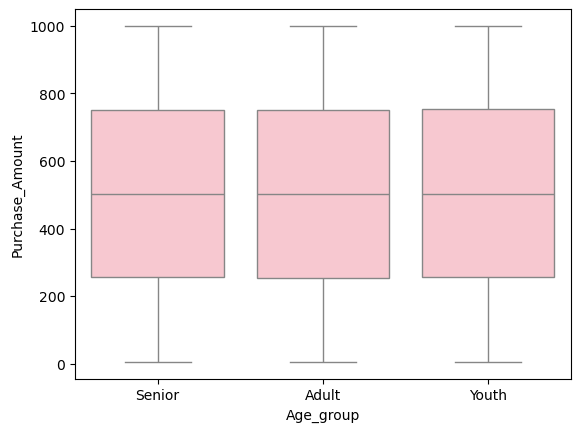

In [64]:
# Boxplot
sns.boxplot(x='Age_group', y='Purchase_Amount', data=data,color = 'pink')
data

<Axes: >

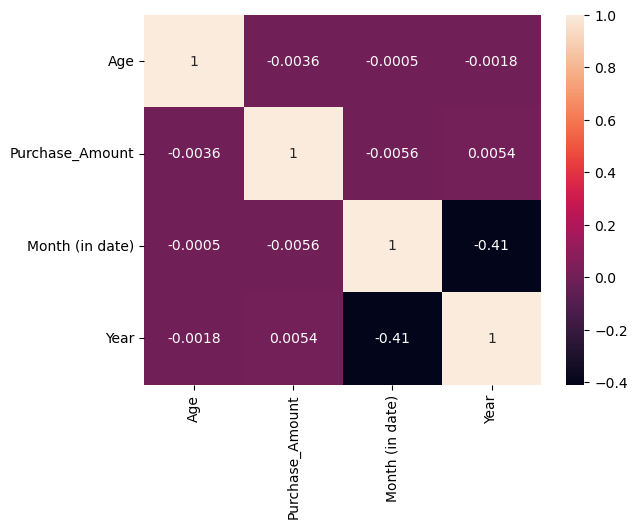

In [76]:
#Heatmap (See how numerical fields like age, purchase amount, etc. are related)
sns.heatmap(data[['Age', 'Purchase_Amount', 'Month (in date)', 'Year']].corr(), annot=True)


C:\Users\palak\AppData\Local\Temp\ipykernel_42040\473870089.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.catplot(x='Year', y='Purchase_Amount', data=data, kind='box', height=8, aspect = 2, hue='Age_group',color = 'pink')


AttributeError: module 'matplotlib' has no attribute 'title'

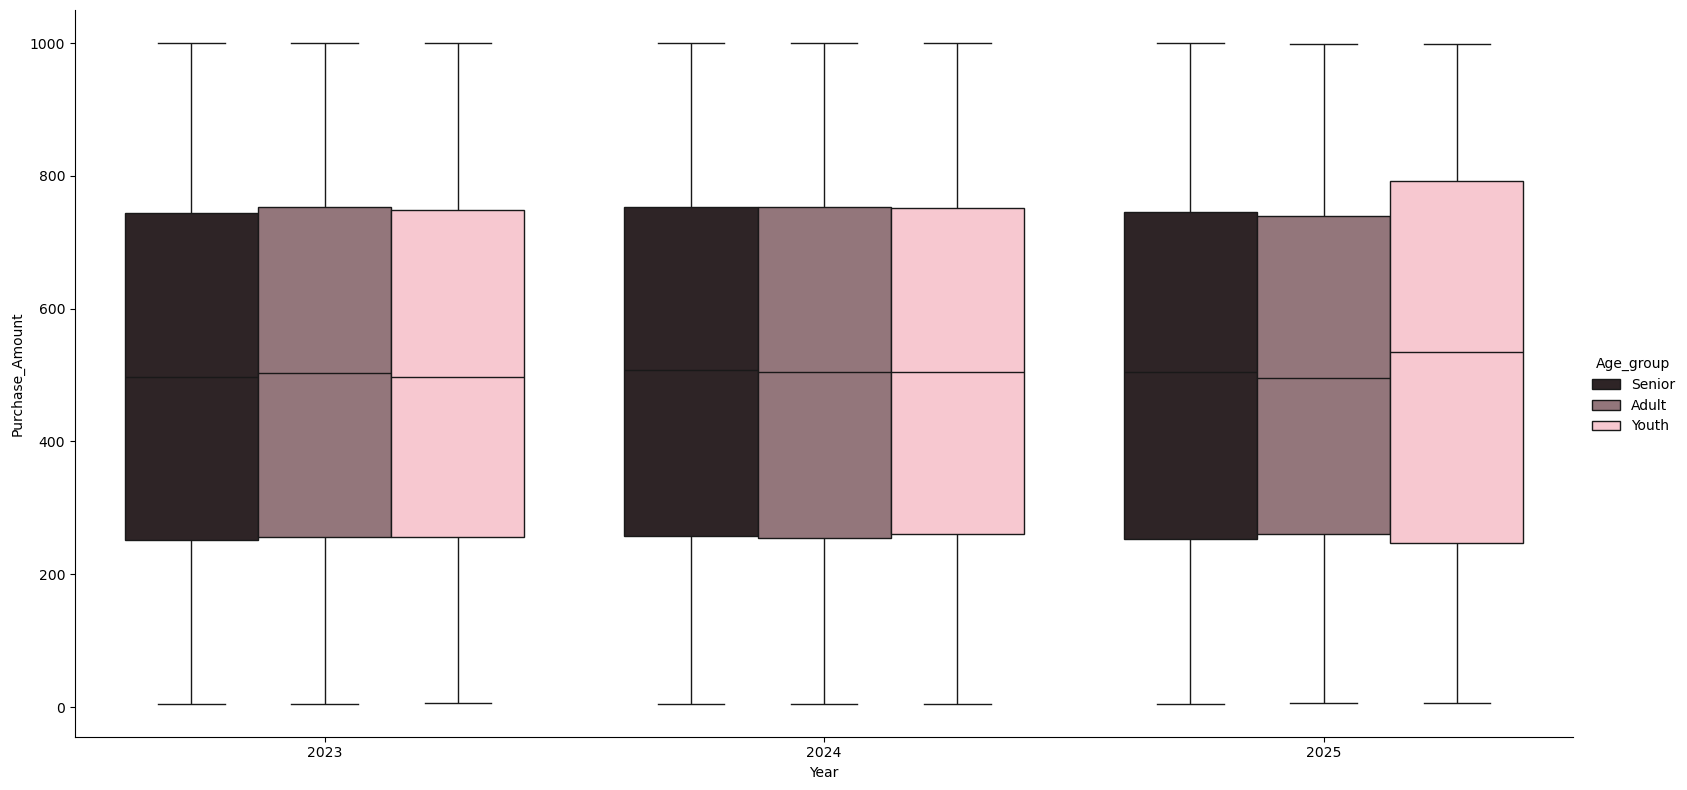

In [73]:
sns.catplot(x='Year', y='Purchase_Amount', data=data, kind='box', height=8, aspect = 2, hue='Age_group',color = 'pink')

plt.title('Catplot')
plt.show()

In [83]:
pd.crosstab(data['Age_group'], data['Payment_Method'], normalize='index') * 100

Payment_Method,Cash on Delivery,Credit Card,Debit Card,Net Banking,PayPal,UPI
Age_group,,,,,,
Adult,16.841388,16.385365,16.872838,16.238599,16.673656,16.988154
Senior,16.734309,16.685115,16.471939,16.635920,16.402247,17.070471
Youth,17.445244,17.062337,17.123602,15.591974,16.357788,16.419053


<Axes: xlabel='Product_Category', ylabel='Country'>

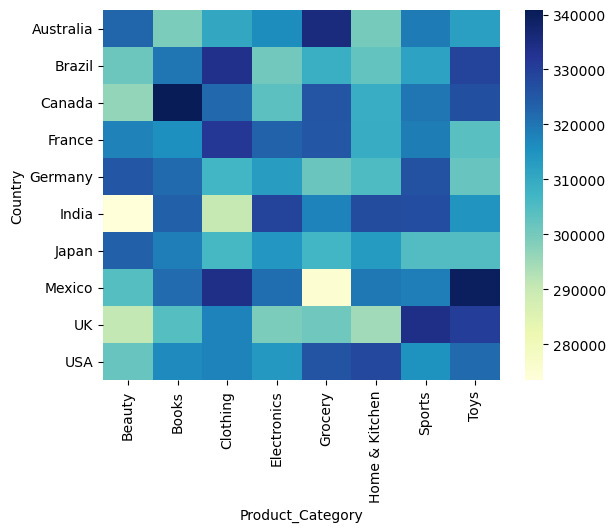

In [85]:
heatmap_data = data.pivot_table(index='Country', columns='Product_Category', values='Purchase_Amount', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='YlGnBu')
